Assignment: PCA Implementation

Objective:

The objective of this assignment is to implement PCA on a given dataset and analyse the results.



Instructions:

Download the wine dataset from the UCI Machine Learning Repository
Load the dataset into a Pandas dataframe.

(https://archive.ics.uci.edu/ml/datasets/Wine).

Split the dataset into features and target variables.

Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

Implement PCA on the preprocessed dataset using the scikit-learn library.
Determine the optimal number of principal components to retain based on the explained variance ratio.

Visualise the results of PCA using a scatter plot.

Deliverables:

Jupyter notebook containing the code for the PCA implementation.

A report summarising the results of PCA and clustering analysis.
Scatter plot showing the results of PCA.

A table showing the performance metrics for the clustering algorithm.


Additional Information:

You can use the python programming language.

You can use any other machine learning libraries or tools as necessary.

You can use any visualisation libraries or tools as necessary.

Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

Interpret the results of PCA and clustering analysis.

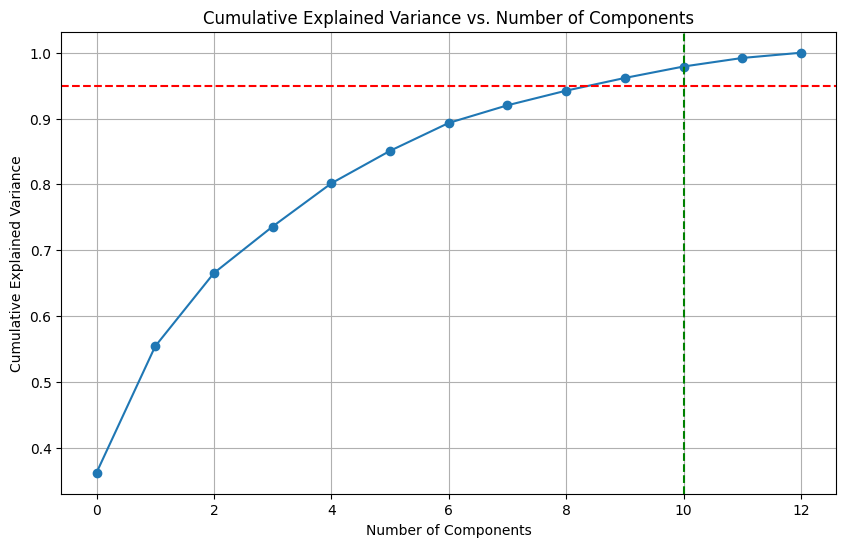

Optimal number of principal components to retain: 10


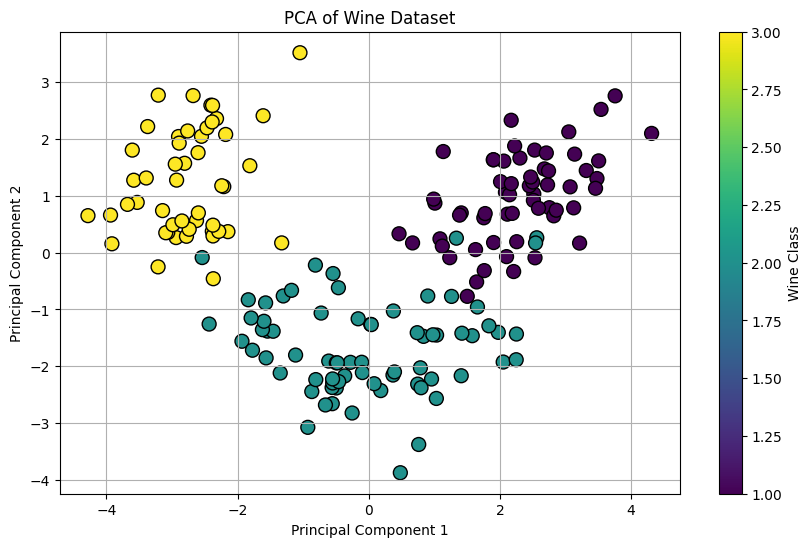

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash",
                "Magnesium", "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols",
                "Proanthocyanins", "Color_Intensity", "Hue", "OD280_OD315", "Proline"]

# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Step 2: Split the dataset into features and target variable
X = wine_data.drop("Class", axis=1)
y = wine_data["Class"]

# Step 3: Data Preprocessing (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Implement PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 5: Determine the optimal number of principal components
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='--')
plt.grid()
plt.show()

# Choose the number of components based on the cumulative variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Optimal number of principal components to retain: {n_components}')

# Step 6: Apply PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

# Step 7: Visualize the results of PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Wine Class')
plt.grid()
plt.show()
